N_0:  1656.1163958157285
tau:  4.091775979889048
Half-life:  2.8362029839430014


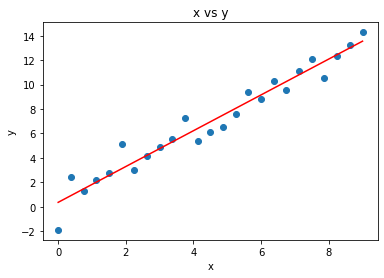

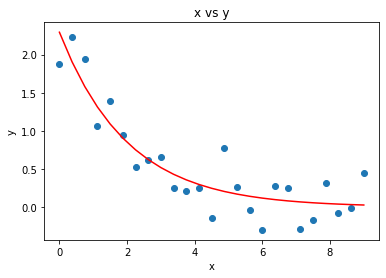

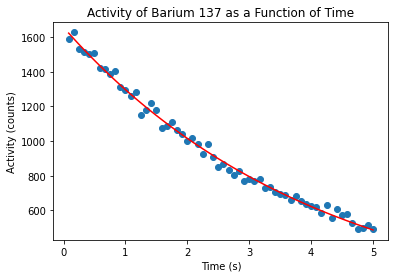

In [ ]:
import matplotlib.pylab as plt
import math
import numpy as np
from scipy.optimize import minimize, curve_fit

#function to generate the y values for all the x values, in the linear case
def linear_model(x, param):
  '''for input slope and intercept return $y= m x + b$'''
  slope, intercept = param
  result = slope*x + intercept
  return result
#function to generate the y values for all the x values, in the exponential case
def exp_model(x,param):
  D, b= param
  result= D*math.exp(-b*x)
  return result
#function to generate the N values for all the t values, in the barium-137 case
def decay_model(t,param):
  global N_0, tau
  N_0, tau = param
  result = N_0 * math.exp(-t/tau)
  return result
#function to generate the F values for all the w(omega) values, in the centripetal case
def centripetal_model(w, mR):
  return mR * w * w

#generating the line for the guess model
def get_model_list(x_points, model, params):
  model_list=[]
  for x in x_points:
    y_model=model(x,params)
    model_list.append(y_model)
  return model_list

#function to determine the value of reduced chi squared
def reduced_chi_squared(expected,observed,uncertainty=1):
  chi_squared=0
  dict_y=dict(zip(observed,expected))
  for i in dict_y:
    chi_squared+=(i-dict_y[i])**2
  N=len(dict_y)
  reducedchisquared=chi_squared/N
  return reducedchisquared

#opening all the required files
files = ["data_points_assign5.txt", "data_points_exp_assign5.txt", "decay.txt"]
#making a list for all the models
models = [linear_model, exp_model, decay_model]
#making a list for all the guesses
guesses =[(2,2), (2,2), (1600, 4)]

#iteraring through all the files to generate graphs for each case
for i in range(len(files)):
  #lists for the x and y values from the data set
  x_points = []
  y_points = []
  #opening the file and reading off the x and y values
  with open(files[i], "r") as file_open:
    for pair in file_open:
      x, y = pair.replace("\n","").split()
      x, y = float(x), float(y)
      #putting the read x and y values in their respective lists
      x_points.append(x)
      y_points.append(y)
      
  #function to determine the value of reduced chi squared
  def chi2_of_model(params):
    return reduced_chi_squared(y_points, get_model_list(x_points, models[i], params))
  #using the scipy.optimize.minimize to optimize the parameters 
  solution=minimize(chi2_of_model, guesses[i], method='Nelder-Mead')
  #getting the optimized line
  min_line = get_model_list(x_points, models[i], solution.x)
  #ploting the figures for each case
  plt.figure()
  if files[i] == "data_points_assign5.txt" or "data_points_exp_assign5.txt":
    plt.title("x vs y")
    plt.xlabel("x")
    plt.ylabel("y")
  if files[i] == "decay.txt":
    plt.title("Activity of Barium 137 as a Function of Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Activity (counts)")
  plt.scatter(x_points, y_points)
  plt.plot(x_points, min_line, 'r')

#printing the determined value of N_0, tau and the half-life of barium-137
print("N_0: ", N_0)
print("tau: ", tau)
print("Half-life: ", tau * np.log(2))

plt.show()

The quadratic model does fit the data, as the line is within the error bars
Our parameters mR is  0.0330707558438219
The mR for the given set of parameters is 0.036
Error in mR: 0.0004
The difference between the given parameters and our parameters is 0.0029
As the difference is more than the error, the given parameters, m=200grams and R=18cm, are not consistent with our parameters


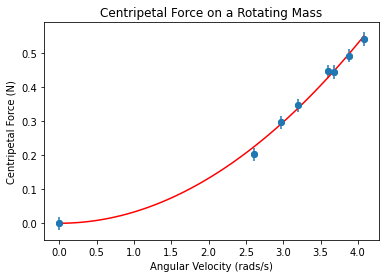

In [ ]:
#creating lists to store the values of omega, centripetal force and the error
omega_list = []
Fc_list = []
error_list = []
#opening the centripetal.txt file to read the values
with open('centripetal.txt', "r") as file_open:
  next(file_open)
  for pair in file_open:
    omega, Fc, error = pair.replace("\n","").split()
    omega, Fc, error = float(omega), float(Fc), float(error)
    #putting the read omega, Fc, and error values in their respective lists
    omega_list.append(omega)
    Fc_list.append(Fc)
    error_list.append(error)
#using the curve_fit to optimize the parameters 
min_mR, pcov = curve_fit(centripetal_model, omega_list, Fc_list, p0=(3.5), sigma=error_list)
min_mR = min_mR[0]
std_err = np.sqrt(pcov[0])

#
more_omegas = np.linspace(0, max(omega_list), 100)
min_Fcurve = get_model_list(more_omegas, centripetal_model, min_mR)

# plot centripetal force vs angular velocity (data points as well as quadratic model) with error bars
plt.figure()
plt.scatter(omega_list, Fc_list)
plt.plot(more_omegas, min_Fcurve, 'r')
plt.title("Centripetal Force on a Rotating Mass")
plt.xlabel("Angular Velocity (rads/s)")
plt.ylabel("Centripetal Force (N)")
plt.errorbar(omega_list, Fc_list, xerr = None, yerr = error_list[0], fmt = 'o')

print("The quadratic model does fit the data, as the line is within the error bars")


#when m=200 grams and R=18cm, mR=0.036 mkg
mR=(200/1000)*(18/100)

#our parameter mR=0.03307

print("Our parameters mR is ",min_mR)
print("The mR for the given set of parameters is",mR )
print("Error in mR: %.4f" %std_err[0])
difference=abs(mR-min_mR)
print("The difference between the given parameters and our parameters is %.4f" %difference)
print("As the difference is more than the error, the given parameters, m=200grams and R=18cm, are not consistent with our parameters")


plt.show()